#### Assumptions in Multilinear Regression
1.**Linearity:** The relationship between the predictors(X) and the response (Y) is linear.

2 .**Independence:** Observations are independent of each other
 
3 .**Homoscedasticity:** The residuals (Y-Y_hat) exhibit constant variance at all levels of the predictor.
 
4 .**Normal Distribution of Errors:** The residuals of the model are normally distributed.
 
5 .**No multicollinearity:** The independent variables should not be too highly correlated with each other.
 
Violations of these assumptions may lead to inefficiency in the regression parameters and unreliable prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [2]:
#Read the data  from csv file
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


#### Description of columns
- MPG: Milege of the car(Mile per Gallon)
- HP: Horse power of the car
- VOL: Volume of the car(size)
- SP: Top speed of the car(Miles per Hour)
- WT: Weight of the car(Pounds)

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [4]:
#Check for missing values
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

#### Observations about info(),missing values
- There are no missing values
- There are 81 Observations(81 different cars data)
- The data types of the columns are also relevant and valid.


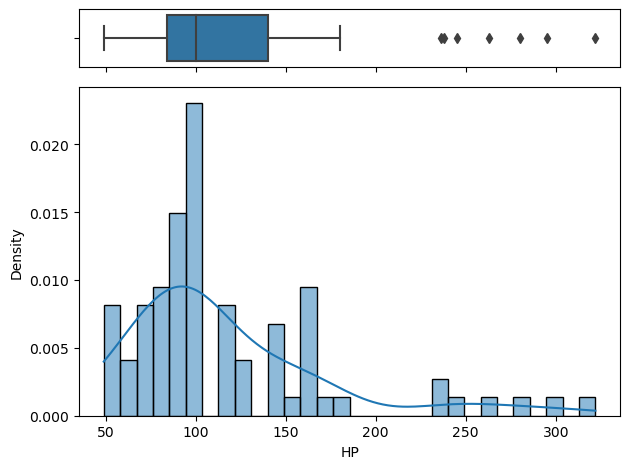

In [9]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(data=cars, x='HP', ax=ax_box, orient='h')
ax_box.set(xlabel='') 

sns.histplot(data=cars, x='HP', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

plt.tight_layout()
plt.show()

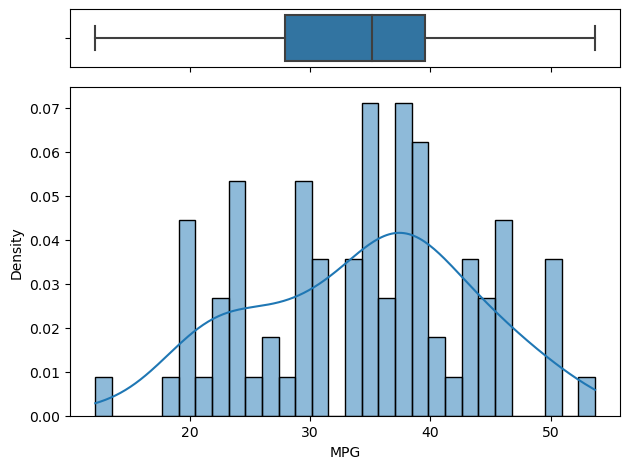

In [10]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(data=cars, x='MPG', ax=ax_box, orient='h')
ax_box.set(xlabel='') 

sns.histplot(data=cars, x='MPG', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

plt.tight_layout()
plt.show()

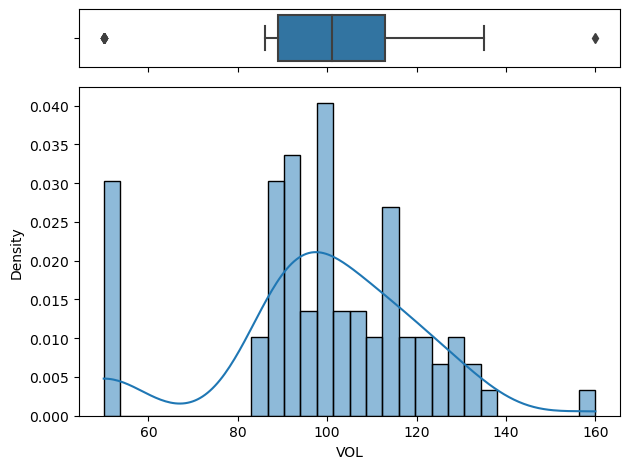

In [11]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(data=cars, x='VOL', ax=ax_box, orient='h')
ax_box.set(xlabel='') 

sns.histplot(data=cars, x='VOL', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

plt.tight_layout()
plt.show()

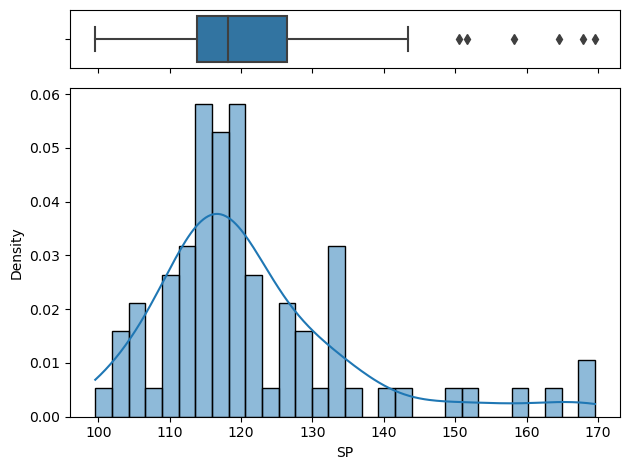

In [12]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(data=cars, x='SP', ax=ax_box, orient='h')
ax_box.set(xlabel='') 

sns.histplot(data=cars, x='SP', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

plt.tight_layout()
plt.show()

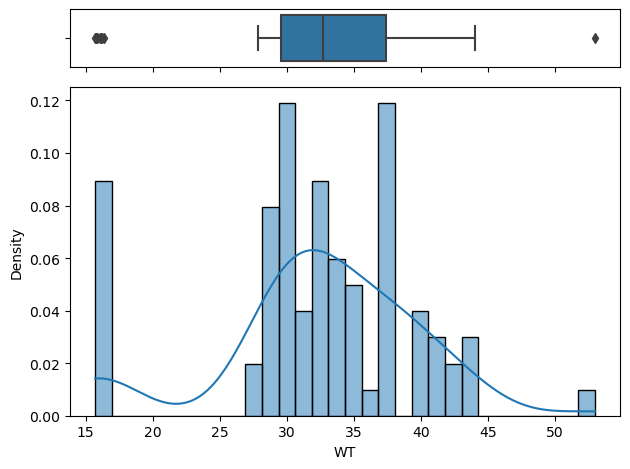

In [13]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(data=cars, x='WT', ax=ax_box, orient='h')
ax_box.set(xlabel='') 

sns.histplot(data=cars, x='WT', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

plt.tight_layout()
plt.show()

#### Observations from boxplot and histograms
- There are some extreme values(outliers) observed in towards the right tail of SP and HP distributions
- In VOL and WT columns,a few outliers are observed in both tails of their distributions
- The extreme values of cars data may have come from the specially designed nature of cars
- As this is multi-dimensional data, the outliers with respect to spatial dimensions may have to be considered while buliding the regression model

In [14]:
cars[cars.duplicated()]

,HP,MPG,VOL,SP,WT


Pair plots and Correlation Coefficients

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


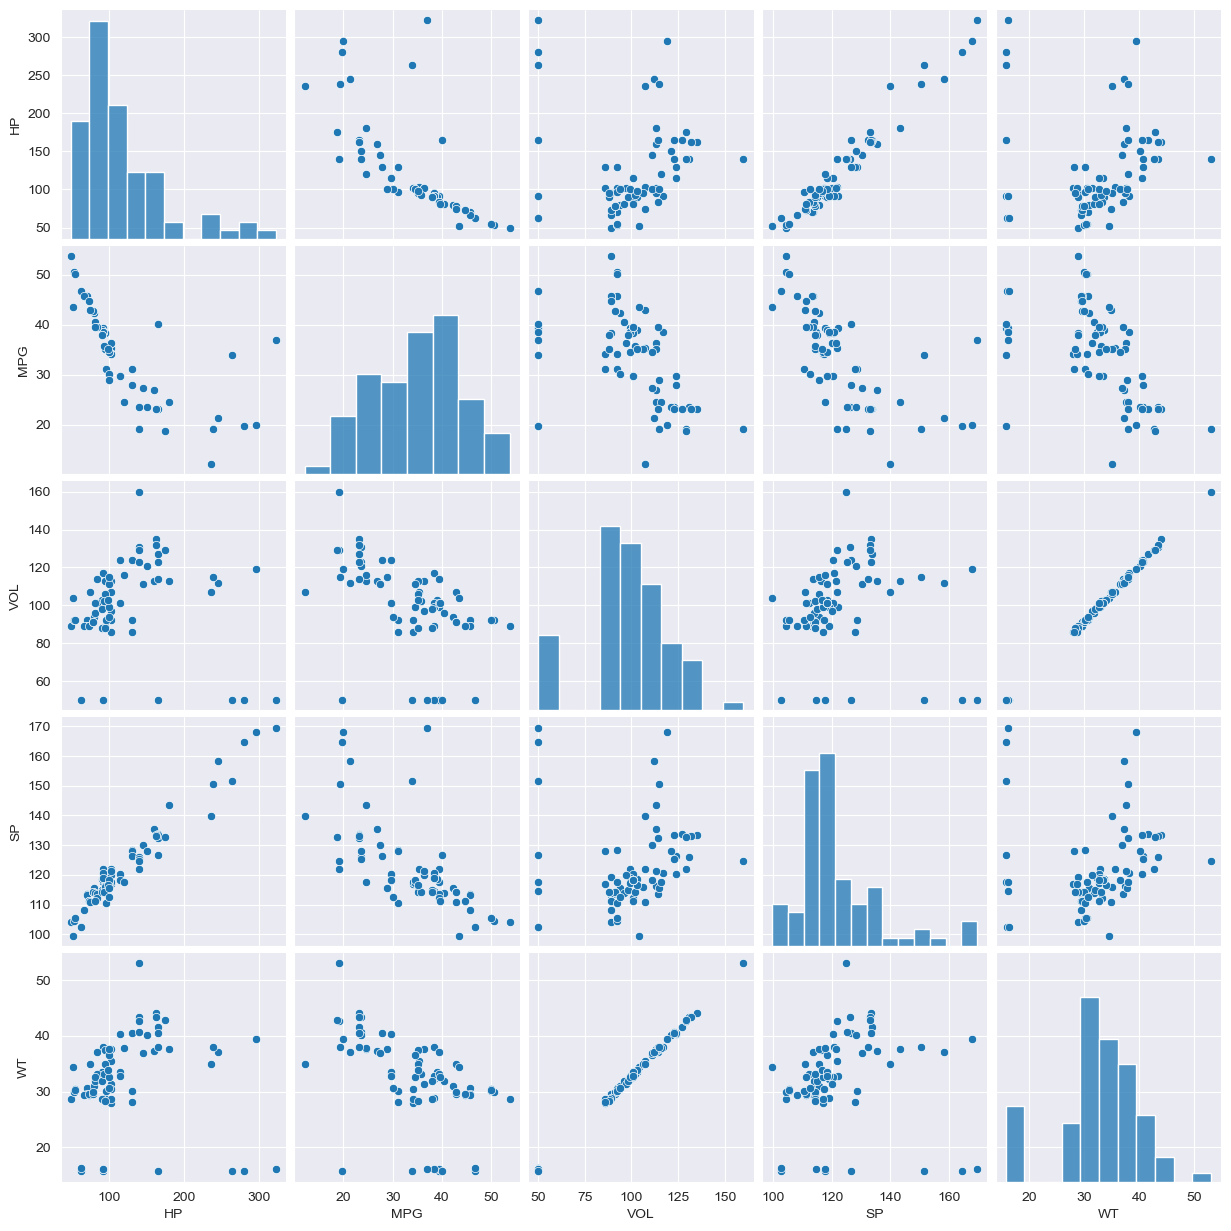

In [15]:
# Pair plot
sns.set_style(style='darkgrid')
sns.pairplot(cars)